MONAI version: 1.4.0
Numpy version: 1.26.4
Pytorch version: 2.3.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 46a5272196a6c2590ca2589029eed8e4d56ff008
MONAI __file__: c:\Users\<username>\anaconda3\envs\pelvis_seg\lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.5.1
ITK version: 5.4.2
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.15.2
Pillow version: 11.1.0
Tensorboard version: 2.19.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.18.1
tqdm version: 4.67.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 6.1.1
pandas version: 2.2.3
einops version: 0.8.1
transformers version: 4.49.0
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: 1.1.3
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recom

Loading dataset: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]


训练数据集加载完成!
开始加载验证数据集...


Loading dataset: 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

验证数据集加载完成!
创建无多进程的训练数据加载器...
创建无多进程的验证数据加载器...
image shape: torch.Size([1, 222, 143, 137]), label shape: torch.Size([1, 222, 143, 137])
Using slice index: 75 for image: 081_0000.nii.gz


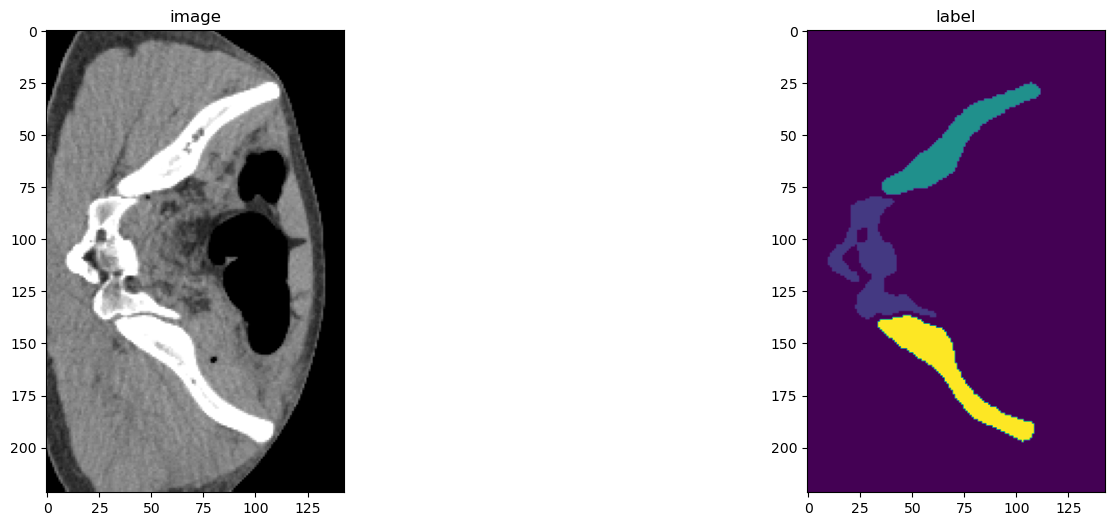



训练设备: cuda
GPU数量: 1
GPU 0: NVIDIA GeForce RTX 4070
当前GPU: 0
CUDA版本: 12.1


训练设备: cuda
GPU数量: 1
GPU 0: NVIDIA GeForce RTX 4070
当前GPU: 0
CUDA版本: 12.1


===== 尝试最小化训练测试 =====
开始最小化训练测试...
执行测试批次前向传播...
计算损失...
损失值: 3.1539
执行反向传播和优化器步骤...
最小化训练测试成功完成!
基础功能测试成功，继续完整训练...

开始训练 - 目标迭代次数: 5000
当前最佳Dice: 0.0000, 在步骤: 0


Epoch 1: 100%|██████████| 80/80 [03:08<00:00,  2.36s/批次, 迭代=80/5000, loss=2.2698, avg_loss=2.5168]



Epoch 1 完成 - 平均损失: 2.5168


Epoch 2:  24%|██▍       | 19/80 [00:56<03:26,  3.38s/批次, 迭代=100/5000, loss=2.2546, avg_loss=2.2399]

输出形状: torch.Size([1, 9, 222, 143, 137]), 标签形状: torch.Size([1, 1, 222, 143, 137])
检测到单通道标签
输出形状: torch.Size([1, 9, 278, 157, 156]), 标签形状: torch.Size([1, 1, 278, 157, 156])
检测到单通道标签
输出形状: torch.Size([1, 9, 256, 219, 141]), 标签形状: torch.Size([1, 1, 256, 219, 141])
检测到单通道标签
输出形状: torch.Size([1, 9, 290, 252, 134]), 标签形状: torch.Size([1, 1, 290, 252, 134])
检测到单通道标签
输出形状: torch.Size([1, 9, 252, 139, 143]), 标签形状: torch.Size([1, 1, 252, 139, 143])
检测到单通道标签
输出形状: torch.Size([1, 9, 225, 125, 133]), 标签形状: torch.Size([1, 1, 225, 125, 133])
检测到单通道标签
输出形状: torch.Size([1, 9, 246, 151, 125]), 标签形状: torch.Size([1, 1, 246, 151, 125])
检测到单通道标签
输出形状: torch.Size([1, 9, 297, 149, 163]), 标签形状: torch.Size([1, 1, 297, 149, 163])
检测到单通道标签
输出形状: torch.Size([1, 9, 265, 265, 146]), 标签形状: torch.Size([1, 1, 265, 265, 146])
检测到单通道标签
输出形状: torch.Size([1, 9, 288, 203, 121]), 标签形状: torch.Size([1, 1, 288, 203, 121])
检测到单通道标签
输出形状: torch.Size([1, 9, 238, 172, 138]), 标签形状: torch.Size([1, 1, 238, 172, 138])
检测到单通道标签
输出形状: torc

Epoch 2:  26%|██▋       | 21/80 [01:54<14:33, 14.80s/批次, 迭代=101/5000, loss=2.2887, avg_loss=2.2422]


新最佳模型! 步骤: 100, Dice: 0.0807


Epoch 2:  30%|███       | 24/80 [02:02<04:45,  5.10s/批次, 迭代=104/5000, loss=2.1977, avg_loss=2.2413]


KeyboardInterrupt: 

In [4]:
import os
import shutil
import tempfile

import matplotlib.pyplot as plt
from tqdm import tqdm

from monai.losses import DiceCELoss
from monai.inferers import sliding_window_inference
from monai.transforms import (
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
    MapTransform,
)

from monai.config import print_config
from monai.metrics import DiceMetric
from monai.networks.nets import UNETR

from monai.data import (
    DataLoader,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
)


import torch

print_config()
# 使用指定路径
root_dir = r"D:\pelvis\ct_seg\data\results\U_net"
os.makedirs(root_dir, exist_ok=True)  # 确保目录存在
print(f"模型和结果将保存到: {root_dir}")

# 添加标签重映射部分
def setup_label_mapping():
    """创建原始标签值到连续索引的映射"""
    original_labels = [0, 1, 2, 11, 12, 13, 21, 22, 23]
    label_to_idx = {label: idx for idx, label in enumerate(original_labels)}
    idx_to_label = {idx: label for label, idx in label_to_idx.items()}
    
    # 打印映射信息
    print("标签映射关系:")
    for orig, new in label_to_idx.items():
        print(f"  原始标签 {orig} -> 新标签 {new}")
    
    return label_to_idx, idx_to_label

# 在使用前添加自定义转换类的定义
class ConvertToMultiChannelBasedOnBratsClassesd(MapTransform):
    """将原始标签值转换为连续的类别索引"""
    def __init__(self, keys, label_mapping):
        super().__init__(keys)
        self.label_mapping = label_mapping
    
    def __call__(self, data):
        d = dict(data)
        for key in self.keys:
            result = torch.zeros_like(d[key])
            # 遍历原始标签值并替换为映射的索引
            for orig_label, new_label in self.label_mapping.items():
                result[d[key] == orig_label] = new_label
            d[key] = result
        return d

# 修改模型定义
label_to_idx, idx_to_label = setup_label_mapping()
num_classes = len(label_to_idx)  # 应该等于9

# 使用一致的空间尺寸变量
patch_size = (64, 64, 64)  # 改为64³而不是96³

# 修改训练转换以使用正确的裁剪尺寸
train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        # 保留必要的预处理步骤
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-175,
            a_max=250,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        # 添加更激进的裁剪以减少内存需求
        CropForegroundd(keys=["image", "label"], source_key="image"),
        # 使用与模型匹配的尺寸
        RandCropByPosNegLabeld(
            keys=["image", "label"],
            label_key="label",
            spatial_size=patch_size,  # 使用一致的尺寸
            pos=1,
            neg=1,
            num_samples=2,
            image_key="image",
            image_threshold=0,
        ),
        # 保留标签转换
        ConvertToMultiChannelBasedOnBratsClassesd(keys="label", label_mapping=label_to_idx),
    ]
)
val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        ScaleIntensityRanged(keys=["image"], a_min=-175, a_max=250, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        # 确保验证数据也使用相同的标签转换
        ConvertToMultiChannelBasedOnBratsClassesd(keys="label", label_mapping=label_to_idx),
    ]
)
data_dir = "D:\\pelvis\\ct_seg\\data"
split_json = os.path.join(data_dir, "dataset.json")

datasets = split_json
datalist = load_decathlon_datalist(datasets, True, "training")
val_files = load_decathlon_datalist(datasets, True, "validation")

# 添加进度显示，监控数据加载过程
print("开始加载训练数据集...")
train_ds = CacheDataset(
    data=datalist,
    transform=train_transforms,
    cache_num=24,
    cache_rate=1.0,
    num_workers=8,
    progress=True,  # 添加进度显示
)
print("训练数据集加载完成!")

print("开始加载验证数据集...")
val_ds = CacheDataset(
    data=val_files, 
    transform=val_transforms, 
    cache_num=6, 
    cache_rate=1.0, 
    num_workers=4,
    progress=True,  # 添加进度显示
)
print("验证数据集加载完成!")

# 创建数据加载器时禁用多进程
print("创建无多进程的训练数据加载器...")
train_loader = DataLoader(
    train_ds, batch_size=1, shuffle=True, 
    num_workers=0,  # 关键修复: 禁用多进程
    pin_memory=True
)

print("创建无多进程的验证数据加载器...")
val_loader = DataLoader(
    val_ds, batch_size=1, 
    num_workers=0,  # 关键修复: 禁用多进程
    pin_memory=True
)

slice_map = {
    "001_0000.nii.gz": 143,
    "002_0000.nii.gz": 178,
    "003_0000.nii.gz": 195,
    "004_0000.nii.gz": 162,
    "005_0000.nii.gz": 186,
    "006_0000.nii.gz": 153,
    "007_0000.nii.gz": 201,
    "008_0000.nii.gz": 172,
    "009_0000.nii.gz": 128,
    "010_0000.nii.gz": 190,
    "011_0000.nii.gz": 165,
    "012_0000.nii.gz": 148,
    "081_0000.nii.gz": 75,
    "082_0000.nii.gz": 156,
    "083_0000.nii.gz": 183,
}
case_num = 0

# 获取图像中间切片作为默认值
def get_middle_slice(img_shape):
    return img_shape[3] // 2  # 获取z轴的中间切片

img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
img = val_ds[case_num]["image"]
label = val_ds[case_num]["label"]
img_shape = img.shape
label_shape = label.shape
print(f"image shape: {img_shape}, label shape: {label_shape}")

# 使用字典的get方法，如果键不存在则使用默认值
slice_index = slice_map.get(img_name, get_middle_slice(img_shape))
print(f"Using slice index: {slice_index} for image: {img_name}")

plt.figure("image", (18, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(img[0, :, :, slice_index].detach().cpu(), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[0, :, :, slice_index].detach().cpu())
plt.show()
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确保模型定义使用相同的尺寸变量
model = UNETR(
    in_channels=1,
    out_channels=num_classes,
    img_size=patch_size,  # 确保这里用的是patch_size=(64,64,64)
    feature_size=16,
    hidden_size=384,
    mlp_dim=1536,
    num_heads=6,
    proj_type="perceptron",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
).to(device)

loss_function = DiceCELoss(
    to_onehot_y=True, 
    softmax=True,
    include_background=False,  # 不考虑背景类的损失
    squared_pred=True  # 平方预测值以增加对小概率值的惩罚
)
torch.backends.cudnn.benchmark = True
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# 滑动窗口推理也应该使用相同的尺寸
roi_size = patch_size  # 确保推理窗口尺寸匹配
sw_batch_size = 4

def train(global_step, train_loader, dice_val_best, global_step_best, max_iter=1000):
    """执行完整训练循环"""
    model.train()
    epoch_loss = 0
    step = 0
    epoch = 0
    
    # 显示目标训练信息
    print(f"\n开始训练 - 目标迭代次数: {max_iter}")
    print(f"当前最佳Dice: {dice_val_best:.4f}, 在步骤: {global_step_best}")
    
    # 继续训练直到达到最大迭代次数
    while global_step < max_iter:
        epoch += 1
        epoch_loss = 0
        step = 0
        
        # 添加进度条显示，减少终端输出
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}", unit="批次")
        
        for batch_data in progress_bar:
            step += 1
            x, y = (
                batch_data["image"].to(device),
                batch_data["label"].to(device),
            )
            
            # 前向传播
            outputs = model(x)
            loss = loss_function(outputs, y)
            
            # 反向传播
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            epoch_loss += loss.item()
            global_step += 1
            
            # 更新进度条显示状态
            progress_bar.set_postfix({
                '迭代': f"{global_step}/{max_iter}",
                'loss': f"{loss.item():.4f}",
                'avg_loss': f"{epoch_loss / step:.4f}"
            })
            
            # 保存损失记录
            if global_step % 20 == 0:
                epoch_loss_values.append(epoch_loss / step)
                
            # 每100步评估一次，减少评估频率提高训练速度
            if global_step % 100 == 0:
                # 清理GPU缓存
                torch.cuda.empty_cache()
                
                # 评估当前模型
                dice_val = evaluate(model, val_loader)
                metric_values.append(dice_val)
                
                # 简化输出，只记录改进
                if dice_val > dice_val_best:
                    dice_val_best = dice_val
                    global_step_best = global_step
                    torch.save(model.state_dict(), os.path.join(root_dir, "best_metric_model.pth"))
                    print(f"\n新最佳模型! 步骤: {global_step}, Dice: {dice_val:.4f}")
                
                # 每500步打印详细评估信息
                if global_step % 500 == 0:
                    print(f"\n评估 @ 步骤 {global_step} - Dice: {dice_val:.4f}, 最佳: {dice_val_best:.4f}")
                
                # 恢复训练模式
                model.train()
                
                # 定期保存检查点，以防训练中断
                if global_step % 500 == 0:
                    torch.save(
                        {
                            "global_step": global_step,
                            "model_state_dict": model.state_dict(),
                            "optimizer_state_dict": optimizer.state_dict(),
                            "dice_val_best": dice_val_best,
                            "global_step_best": global_step_best,
                        },
                        os.path.join(root_dir, f"checkpoint_{global_step}.pth"),
                    )
            
            # 达到最大迭代次数则提前结束
            if global_step >= max_iter:
                break
        
        # 每个epoch结束后打印总结
        print(f"\nEpoch {epoch} 完成 - 平均损失: {epoch_loss / step:.4f}")
    
    # 返回训练结果
    return global_step, dice_val_best, global_step_best

def evaluate(model, dataloader):
    model.eval()
    dice_metric = DiceMetric(include_background=False, reduction="mean")
    
    # 修改这里，为输出和标签使用不同的转换器
    post_pred = AsDiscrete(argmax=True, to_onehot=num_classes)
    post_label = AsDiscrete(to_onehot=num_classes)
    
    with torch.no_grad():
        for val_data in dataloader:
            val_inputs, val_labels = val_data["image"].to(device), val_data["label"].to(device)
            
            # 这里也要使用相同的尺寸
            roi_size = patch_size  # 使用全局变量patch_size=(64,64,64)
            sw_batch_size = 4
            outputs = sliding_window_inference(val_inputs, roi_size, sw_batch_size, model)
            
            # 打印形状信息以便调试
            print(f"输出形状: {outputs.shape}, 标签形状: {val_labels.shape}")
            
            # 检查标签形状，如果已经是多通道，则调整处理方式
            if val_labels.shape[1] > 1:  # 多通道标签
                print("检测到多通道标签，调整处理方式")
                # 对于多通道标签，我们假设它们已经是独热编码
                outputs = [post_pred(i) for i in decollate_batch(outputs)]
                labels = decollate_batch(val_labels)  # 不对标签做额外处理
            else:  # 单通道标签
                print("检测到单通道标签")
                outputs = [post_pred(i) for i in decollate_batch(outputs)]
                labels = [post_label(i) for i in decollate_batch(val_labels)]
            
            # 计算Dice指标
            try:
                dice_metric(y_pred=outputs, y=labels)
            except Exception as e:
                print(f"计算Dice时出错: {e}")
                print(f"输出类型: {type(outputs)}, 形状: {[o.shape for o in outputs]}")
                print(f"标签类型: {type(labels)}, 形状: {[l.shape for l in labels]}")
                return 0.0  # 如果出错，返回0作为Dice值
        
        # 获取指标结果
        metric_result = dice_metric.aggregate()
        dice_metric.reset()
        
        # 正确处理不同类型的返回值
        if isinstance(metric_result, (list, tuple)):
            # 多类别结果 - 将元组/列表转换为平均值
            metric_values = [m.item() if isinstance(m, torch.Tensor) else float(m) for m in metric_result]
            metric_str = ", ".join([f"{m:.4f}" for m in metric_values])
            print(f"各类别Dice得分: {metric_str}")
            # 计算平均值作为总体指标
            metric = sum(metric_values) / len(metric_values) if metric_values else 0.0
            print(f"平均Dice得分: {metric:.4f}")
        elif isinstance(metric_result, torch.Tensor):
            # 单类别或已经平均的结果
            if metric_result.numel() > 1:  # 多元素张量
                metric_values = metric_result.detach().cpu().numpy()
                metric_str = ", ".join([f"{float(m):.4f}" for m in metric_values])
                print(f"各类别Dice得分: {metric_str}")
                metric = float(metric_result.mean().item())
                print(f"平均Dice得分: {metric:.4f}")
            else:  # 单元素张量
                metric = float(metric_result.item())
                print(f"Dice得分: {metric:.4f}")
        else:
            # 其他情况，尝试转换为浮点数
            try:
                metric = float(metric_result)
                print(f"Dice得分: {metric:.4f}")
            except (TypeError, ValueError):
                print(f"无法处理的Dice得分类型: {type(metric_result)}")
                metric = 0.0
    
    return metric  # 返回单个平均值

# 注释掉监视器输出相关代码
"""
# 监视器线程函数
def monitor_thread():
    import time
    import sys
    import threading
    import traceback
    
    print("监视器线程已启动，将监控程序进展...")
    
    while True:
        time.sleep(30)  # 每30秒检查一次
        print("\n[监视器] 已等待 30.0 秒无明显进展")
        
        print("\n[监视器] 当前所有线程堆栈信息:")
        for th in threading.enumerate():
            print(f"\n线程 {th.name}:")
            if th.ident:  # 确保线程ID存在
                traceback.print_stack(sys._current_frames()[th.ident])

# 启动监视器线程
monitor_thread_instance = threading.Thread(target=monitor_thread, daemon=True, name="monitor_thread")
monitor_thread_instance.start()
"""

# 显示训练设备信息，保留这部分有用信息
print("\n\n==================================================")
print(f"训练设备: {device}")
if torch.cuda.is_available():
    print(f"GPU数量: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    print(f"当前GPU: {torch.cuda.current_device()}")
    print(f"CUDA版本: {torch.version.cuda}")
print("==================================================\n")

# 原来监视器代码之后的测试函数
def minimal_train_test():
    """最小化训练循环，只测试第一个批次"""
    print("开始最小化训练测试...")
    model.train()
    
    try:
        # 获取一个批次进行测试
        for batch_data in train_loader:
            x, y = (
                batch_data["image"].to(device),
                batch_data["label"].to(device),
            )
            
            # 简化输出，只显示关键信息
            print("执行测试批次前向传播...")
            outputs = model(x)
            
            print("计算损失...")
            loss = loss_function(outputs, y)
            print(f"损失值: {loss.item():.4f}")
            
            print("执行反向传播和优化器步骤...")
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            print("最小化训练测试成功完成!")
            return True
        
        print("警告: 没有找到训练数据!")
        return False
            
    except Exception as e:
        print(f"最小化训练测试失败: {str(e)}")
        import traceback
        traceback.print_exc()
        return False

if __name__ == '__main__':
    # 添加这行代码以支持Windows多进程
    import multiprocessing
    multiprocessing.freeze_support()
    
    # 显示训练设备信息
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"\n{'='*50}")
    print(f"训练设备: {device}")
    
    if torch.cuda.is_available():
        print(f"GPU数量: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"当前GPU: {torch.cuda.current_device()}")
        print(f"CUDA版本: {torch.version.cuda}")
    else:
        print("警告: 没有可用的GPU，训练将在CPU上进行(速度会很慢!)")
    print(f"{'='*50}\n")
    
    # 将主要执行代码移到这里
    max_iterations = 5000  # 减少迭代次数以便更快完成训练测试
    eval_num = 500
    post_label = AsDiscrete(to_onehot=14)
    post_pred = AsDiscrete(argmax=True, to_onehot=14)
    dice_metric = DiceMetric(include_background=True, reduction="mean", get_not_nans=False)
    global_step = 0
    dice_val_best = 0.0
    global_step_best = 0
    epoch_loss_values = []
    metric_values = []

    # 注释掉所有监视器相关代码
    """
    import threading
    import time

    # 添加监视器线程检测死锁
    def monitor_thread():
        #监视主线程，如果长时间无进展则打印堆栈信息
        import sys
        import traceback
        
        start_time = time.time()
        while True:
            time.sleep(30)  # 每30秒检查一次
            elapsed = time.time() - start_time
            print(f"\n[监视器] 已等待 {elapsed:.1f} 秒无明显进展")
            
            # 打印所有线程的堆栈信息
            print("\n[监视器] 当前所有线程堆栈信息:")
            for th in threading.enumerate():
                print(f"\n线程 {th.name}:")
                traceback.print_stack(sys._current_frames()[th.ident])
            
            if elapsed > 300:  # 5分钟后提供建议
                print("\n[监视器] 程序可能已死锁。建议:")
                print("1. 按Ctrl+C中断程序")
                print("2. 尝试以下修复方案:")
                print("   - 设置num_workers=0")
                print("   - 移除CacheDataset")
                print("   - 创建更简单的训练循环")

    # 启动监视器线程
    monitor = threading.Thread(target=monitor_thread, daemon=True)
    monitor.start()
    print("监视器线程已启动，将监控程序进展...")
    """
    
    print("\n===== 尝试最小化训练测试 =====")
    if minimal_train_test():
        print("基础功能测试成功，继续完整训练...")
        # 修复: 传入最大迭代次数参数
        train_results = train(0, train_loader, 0, 0, max_iterations)
        
        print(f"训练返回结果: {train_results}")
        
        # 正确解析三个返回值
        iterations, dice_val_best, global_step_best = train_results
        
        print(f"训练完成，总迭代次数: {iterations}")
        print(f"最佳指标: {dice_val_best:.4f}，在迭代步骤: {global_step_best}")
        
        # 强制保存最终模型，无论性能如何
        print("强制保存最终模型...")
        model_file = os.path.join(root_dir, "final_model.pth")
        torch.save(model.state_dict(), model_file)
        print(f"已保存最终模型至: {model_file}")
        
        # 检查最终模型文件
        if os.path.exists(model_file):
            print(f"确认: 最终模型文件已成功保存")
            
            # 加载最终模型用于评估
            model.load_state_dict(torch.load(model_file))
            print(f"已加载最终模型进行评估")
            
            # 确保使用正确的滑动窗口大小
            val_inputs = torch.unsqueeze(img, 1).cuda()
            val_labels = torch.unsqueeze(label, 1).cuda()
            
            # 使用与模型定义一致的patch_size
            val_outputs = sliding_window_inference(
                val_inputs, 
                roi_size=patch_size,  # 使用与模型定义相同的尺寸
                sw_batch_size=1,      # 减小批次大小从4到1
                predictor=model, 
                overlap=0.5           # 减小重叠度从0.8到0.5
            )
            
            # 模型评估和可视化
            plt.figure("train", (12, 6))
            plt.subplot(1, 2, 1)
            plt.title("Iteration Average Loss")
            x = [eval_num * (i + 1) for i in range(len(epoch_loss_values))]
            y = epoch_loss_values
            plt.xlabel("Iteration")
            plt.plot(x, y)
            plt.subplot(1, 2, 2)
            plt.title("Val Mean Dice")
            x = [eval_num * (i + 1) for i in range(len(metric_values))]
            y = metric_values
            plt.xlabel("Iteration")
            plt.plot(x, y)
            plt.show()

            case_num = 4
            model.eval()
            with torch.no_grad():
                img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
                img = val_ds[case_num]["image"]
                label = val_ds[case_num]["label"]
                val_inputs = torch.unsqueeze(img, 1).cuda()
                val_labels = torch.unsqueeze(label, 1).cuda()
                val_outputs = sliding_window_inference(val_inputs, patch_size, 1, model, overlap=0.5)
                plt.figure("check", (18, 6))
                plt.subplot(1, 3, 1)
                plt.title("image")
                plt.imshow(val_inputs.cpu().numpy()[0, 0, :, :, slice_map[img_name]], cmap="gray")
                plt.subplot(1, 3, 2)
                plt.title("label")
                plt.imshow(val_labels.cpu().numpy()[0, 0, :, :, slice_map[img_name]])
                plt.subplot(1, 3, 3)
                plt.title("output")
                plt.imshow(torch.argmax(val_outputs, dim=1).detach().cpu()[0, :, :, slice_map[img_name]])
                plt.show()
        else:
            print(f"错误: 最终模型文件未能保存: {model_file}")
            print("请检查磁盘空间和写入权限")
        
        # 单独检查是否有最佳模型(如果Dice分数大于0)
        if dice_val_best > 0:
            best_model_file = os.path.join(root_dir, "best_metric_model.pth")
            if os.path.exists(best_model_file):
                print(f"最佳模型也已保存: {best_model_file}")
    else:
        print("基础功能测试失败，跳过完整训练...")
        print("建议检查数据和模型兼容性问题")